# Pymaceuticals Inc.
---

### Analysis
Among these treatments, Capomulin and Ramicane appear to be the most effective in reducing tumor volume, as they have the lowest average tumor volumes at the end of the treatment period. There's a positive correlation between mouse weight and average tumor volume among mice treated with Capomulin. The final tumor volumes for mice treated with Infubinol and Ceftamin are relatively higher on average. This correlation indicates that heavier mice tend to have larger tumor volumes, which may affect treatment effectiveness. In conclusion, while Capomulin and Ramicane show promise in reducing tumor volume, further research is needed to understand individual treatment responses and optimize treatment strategies for better outcomes. 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
print(merged_data.head())


  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [12]:
# Count the number of unique mice
num_unique_mice = merged_data["Mouse ID"].nunique()

print("Number of unique mice:", num_unique_mice)

Number of unique mice: 249


In [13]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_rows = merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)

# Filter the merged DataFrame to show only the duplicate rows
duplicate_mice = merged_data[duplicate_rows]

# Get the unique IDs of the duplicate mice
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()

# Display the duplicate mice
print("Duplicate Mice IDs:", duplicate_mouse_ids)
print(duplicate_mice)

Duplicate Mice IDs: ['g989']
    Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
908     g989     Propriva  Female          21          26          0   
909     g989     Propriva  Female          21          26          0   
910     g989     Propriva  Female          21          26          5   
911     g989     Propriva  Female          21          26          5   
912     g989     Propriva  Female          21          26         10   
913     g989     Propriva  Female          21          26         10   
914     g989     Propriva  Female          21          26         15   
915     g989     Propriva  Female          21          26         15   
916     g989     Propriva  Female          21          26         20   
917     g989     Propriva  Female          21          26         20   

     Tumor Volume (mm3)  Metastatic Sites  
908           45.000000                 0  
909           45.000000                 0  
910           48.786801                 0  
91

In [30]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_data = merged_data[merged_data["Mouse ID"] != 'g989']

# Display the first few rows of the cleaned DataFrame to verify
print(cleaned_data.head())

  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [15]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice_cleaned = cleaned_data["Mouse ID"].nunique()

print("Number of unique mice in the cleaned DataFrame:", num_unique_mice_cleaned)

Number of unique mice in the cleaned DataFrame: 248


## Summary Statistics

In [16]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
summary_stats = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# mean, median, variance, standard deviation, and SEM of the tumor volume.
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']

# Assemble the resulting series into a single summary DataFrame.
print(summary_stats)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [19]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_advanced = merged_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})
print(summary_stats_advanced)


                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.322552  50.854632  42.351070            6.507770  0.512884
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

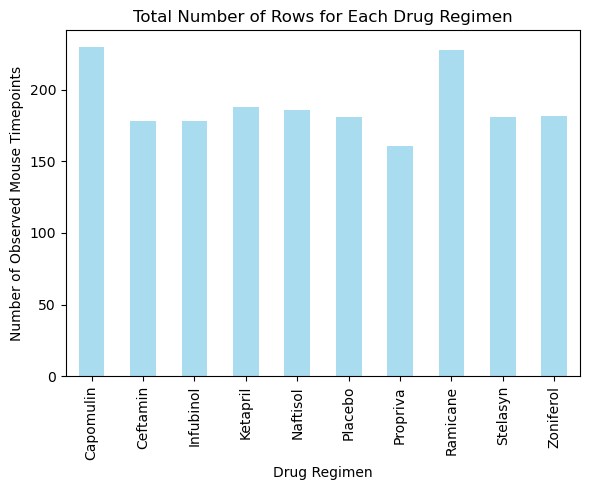

In [17]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count_by_regimen = merged_data.groupby('Drug Regimen').size()

# Creating a bar plot
count_by_regimen.plot(kind='bar', figsize=(6, 5), color='skyblue', alpha=0.7)

# Adding labels and title
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

# Displaying the plot
plt.tight_layout()
plt.show()

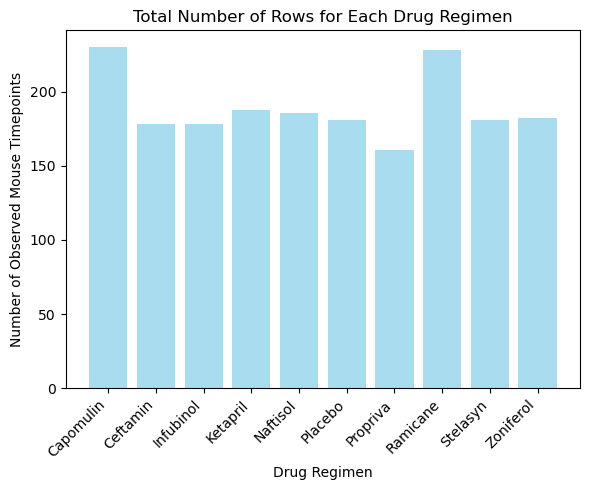

In [18]:
import matplotlib.pyplot as plt

# Grouping the data by 'Drug Regimen' and counting the number of rows in each group
count_by_regimen = merged_data.groupby('Drug Regimen').size()

# Extracting regimen names and counts
regimen_names = count_by_regimen.index
counts = count_by_regimen.values

# Creating a bar plot
plt.figure(figsize=(6, 5))
plt.bar(regimen_names, counts, color='skyblue', alpha=0.7)

# Adding labels and title
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')

# Rotating x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Displaying the plot
plt.tight_layout()
plt.show()

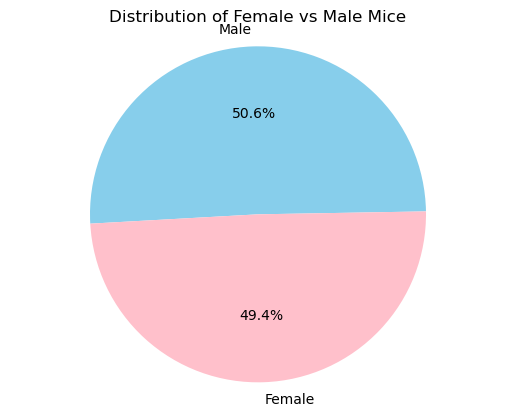

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# Group the data by 'Sex' and count the number of occurrences for each category
sex_distribution = merged_data['Sex'].value_counts()

# Plot the pie chart
sex_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=1, colors=['skyblue', 'pink'])
plt.title('Distribution of Female vs Male Mice')
plt.ylabel('')  # Remove the y-axis label
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

# Display the plot
plt.show()

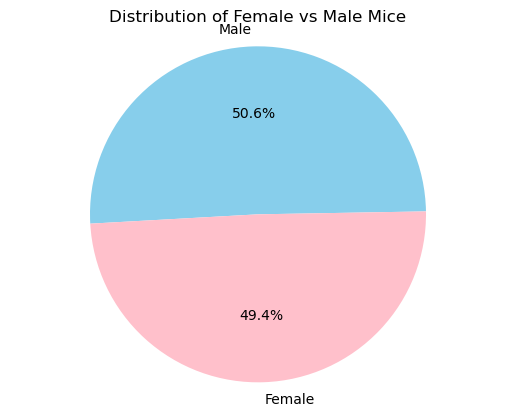

In [26]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of occurrences for each category
sex_distribution = merged_data['Sex'].value_counts()

# Define labels and sizes for the pie chart
labels = sex_distribution.index
sizes = sex_distribution.values

# Define colors for each category
colors = ['skyblue', 'pink']

# Create the pie chart
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=1)

# Add a title
plt.title('Distribution of Female vs Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [24]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max_timepoint = merged_data.groupby('Mouse ID')['Timepoint'].max()

selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volume = merged_data[merged_data['Drug Regimen'].isin(selected_regimens)]

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(final_tumor_volume, max_timepoint, on=['Mouse ID', 'Timepoint'])

# Display the DataFrame with the final tumor volume for each mouse
print(final_tumor_volume.head())

  Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane    Male          21          16         45   
1     s185    Capomulin  Female           3          17         45   
2     x401    Capomulin  Female          16          15         45   
3     m601    Capomulin    Male          22          17         45   
4     g791     Ramicane    Male          11          16         45   

   Tumor Volume (mm3)  Metastatic Sites  
0           22.050126                 1  
1           23.343598                 1  
2           28.484033                 0  
3           28.430964                 1  
4           29.128472                 1  


In [25]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []
outliers = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volumes = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Add tumor volumes to the list for plotting
    tumor_vol_data.append(tumor_volumes)
    
    # Calculate quartiles and IQR
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    
    # Determine potential outliers using upper and lower bounds
    lower_bound = lower_quartile - (1.5 * iqr)
    upper_bound = upper_quartile + (1.5 * iqr)
    
    # Find potential outliers
    potential_outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    
    # Store potential outliers, if any
    if not potential_outliers.empty:
        outliers.extend(potential_outliers)
    
    # Print results
    print(f"----- {treatment} -----")
    print(f"IQR for {treatment}: {iqr}")
    print(f"Lower Bound for {treatment}: {lower_bound}")
    print(f"Upper Bound for {treatment}: {upper_bound}")
    print(f"Potential outliers for {treatment}: {potential_outliers}\n")

# Print potential outliers found across all treatments
if outliers:
    print(f"Potential outliers: {outliers}")
else:
    print("No potential outliers found.")

----- Capomulin -----
IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)

----- Ramicane -----
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)

----- Infubinol -----
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Potential outliers for Infubinol: 58    36.321346
Name: Tumor Volume (mm3), dtype: float64

----- Ceftamin -----
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)

Potential outliers: [36.3213458]


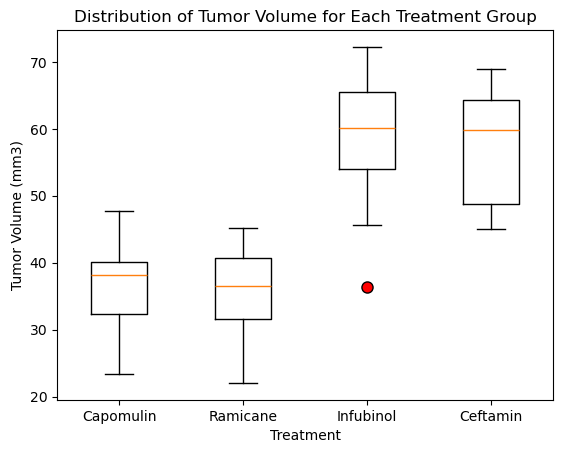

In [26]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Create a boxplot
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=8))

# Add labels and title
plt.xlabel('Treatment')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Show the plot
plt.show()

## Line and Scatter Plots

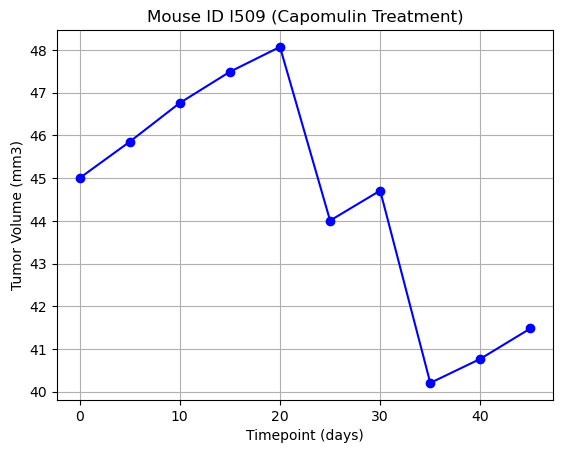

In [28]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Step 1: Filter the data to include only mice treated with Capomulin
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Step 2: Select a single mouse from the filtered data (you can choose any mouse ID)
selected_mouse_id = 'l509'  # Example: Mouse ID 's185'
selected_mouse_data = capomulin_data[capomulin_data['Mouse ID'] == selected_mouse_id]

# Step 3: Plot tumor volume vs. time point for the selected mouse
plt.plot(selected_mouse_data['Timepoint'], selected_mouse_data['Tumor Volume (mm3)'], marker='o', color='b')

# Add labels and title
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Mouse ID {selected_mouse_id} (Capomulin Treatment)')

# Show the plot
plt.grid(True)
plt.show()

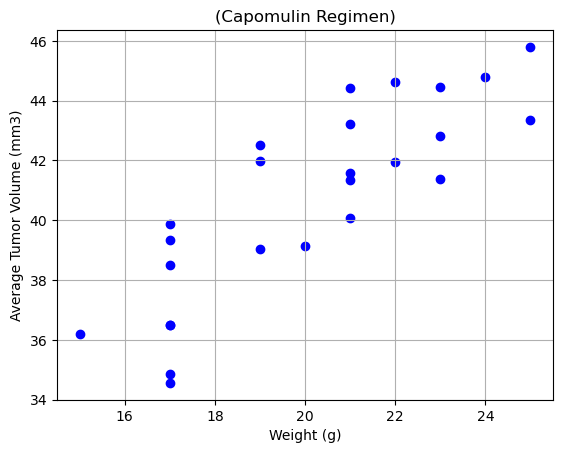

In [29]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Step 1: Group the Capomulin data by mouse ID and calculate the average tumor volume for each mouse
capomulin_avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Step 2: Merge the average tumor volume data with the mouse metadata to include weight information
capomulin_avg_tumor_volume = pd.DataFrame(capomulin_avg_tumor_volume).reset_index()
capomulin_avg_tumor_volume = pd.merge(capomulin_avg_tumor_volume, mouse_metadata, on='Mouse ID')

# Step 3: Plot mouse weight versus average tumor volume
plt.scatter(capomulin_avg_tumor_volume['Weight (g)'], capomulin_avg_tumor_volume['Tumor Volume (mm3)'], color='blue')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('(Capomulin Regimen)')

# Show the plot
plt.grid(True)
plt.show()


## Correlation and Regression

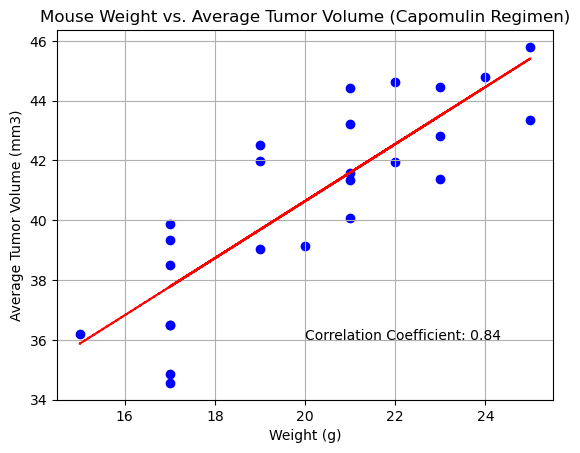

Correlation Coefficient: 0.84
Slope: 0.95
Intercept: 21.55
R-squared: 0.71
P-value: 0.00


In [32]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
from scipy.stats import linregress

# Calculate correlation coefficient
correlation_coefficient = capomulin_avg_tumor_volume['Weight (g)'].corr(capomulin_avg_tumor_volume['Tumor Volume (mm3)'])

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(capomulin_avg_tumor_volume['Weight (g)'], capomulin_avg_tumor_volume['Tumor Volume (mm3)'])

# Calculate the regression line
regression_line = slope * capomulin_avg_tumor_volume['Weight (g)'] + intercept

# Plot the scatter plot
plt.scatter(capomulin_avg_tumor_volume['Weight (g)'], capomulin_avg_tumor_volume['Tumor Volume (mm3)'], color='blue')

# Plot the regression line
plt.plot(capomulin_avg_tumor_volume['Weight (g)'], regression_line, color='red', linestyle='--')

# Add labels and title
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

# Add correlation coefficient to the plot
plt.text(20, 36, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=10, color='black')

# Show the plot
plt.grid(True)
plt.show()

# Print the correlation coefficient and linear regression statistics
print(f"Correlation Coefficient: {correlation_coefficient:.2f}")
print(f"Slope: {slope:.2f}")
print(f"Intercept: {intercept:.2f}")
print(f"R-squared: {rvalue**2:.2f}")
print(f"P-value: {pvalue:.2f}")
